# Limpeza dos dados
## Roubo de Celulares

Com os dados obtidos  e já compilados, o próximo passo é realizar a limpeza do dataset
Isso consiste em:
 - Separar a cidade de São Bernardo do Campo
 - Verificar valores nulos
 - Campos duplicados
 - Remover informações que não serão úteis
 - Acertar ou remover informações erradas

### Importar as bibliotecas

As bibliotecas que serão utilizadas são:
 - `Pandas` - Manipulação do dataset
 - `Matplotlib` - Visualização dos dados
 - `Seaborn`- Visualização dos dados
 - `Numpy` - habilita propriedades matemáticas

In [1]:
#importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Carregar o dataset de roubo de celulares

Carregar o dataset, verificar suas dimensões e ter as primeiras impressões

In [2]:
path = 'data_cleaned/roubo_celular2010_2020.csv'

df = pd.read_csv(path, low_memory=False) # Utilizado o low_memory = False devido ao tamnho do arquivo

In [3]:
print('{} Linhas\n{} Colunas'.format(df.shape[0],df.shape[1]))
df.head() # Mostra as 5 primeiras linhas do dataset

2916556 Linhas
54 Colunas


,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,...,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
0,2010,1,1/2010,01/01/2010 00:01:56,01/01/2010 00:06:30,31/12/2009,23:30,A NOITE,31/12/2009,01/01/2010 00:01:56,...,EFW1311,SP,SAO PAULO,Branco,GM/MERIVA MAXX,2008.0,2009.0,AUTOMOVEL,NaN,NaN
1,2010,1,1/2010,01/01/2010 00:12:43,01/01/2010 00:42:33,31/12/2009,21:45,A NOITE,01/01/2010,01/01/2010 00:12:43,...,DRT2577,SP,SAO PAULO,Prata,HONDA/FIT LX,2005.0,2006.0,AUTOMOVEL,1.0,LG
2,2010,1,1/2010,01/01/2010 00:45:14,01/01/2010 00:49:11,31/12/2009,21:30,A NOITE,01/01/2010,01/01/2010 00:45:14,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NOKIA
3,2010,1,1/2010,01/01/2010 01:12:50,01/01/2010 01:18:00,31/12/2009,23:45,A NOITE,01/01/2010,01/01/2010 01:12:50,...,EHI2812,SP,JACAREI,Preta,HONDA/NXR150 BROS KS,2009.0,2009.0,MOTOCICLO,NaN,NaN
4,2010,2,2/2010,01/01/2010 01:03:13,01/01/2010 01:33:59,31/12/2009,21:40,A NOITE,01/01/2010,01/01/2010 01:03:13,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,MOTOROLA MODELO V3


### Extrair os dados da cidade de Sâo Bernardo do Campo

Como o foco da análise será somente a cidade de São Bernardo do Campo, deve-se entender como foi registrado o nome das cidades e achar a cidade escolhida.

In [4]:
df.CIDADE.unique()

array(['S.PAULO', 'CAMPINAS', 'S.JOSE DOS CAMPOS', 'ANDRADINA', 'S.ANDRE',
       'S.BERNARDO DO CAMPO', 'DIADEMA', 'GUARUJA', 'RIO CLARO',
       'CARAPICUIBA', 'AMERICANA', 'CUBATAO', 'SUZANO', 'S.SEBASTIAO',
       'PRAIA GRANDE', 'S.VICENTE', 'GUARULHOS', 'OSASCO', 'SANTOS',
       'PERUIBE', 'FRANCISCO MORATO', 'RIBEIRAO PRETO', 'ATIBAIA',
       'BARUERI', 'ITANHAEM', 'PIRACICABA', nan, 'CARAGUATATUBA',
       'JACAREI', 'TABOAO DA SERRA', 'S.CAETANO DO SUL', 'POA', 'MARILIA',
       'FERRAZ DE VASCONCELOS', 'SOROCABA', 'ITAQUAQUECETUBA',
       'MOGI DAS CRUZES', 'SANTANA DE PARNAIBA', 'CAMPOS DO JORDAO',
       'RIBEIRAO PIRES', 'HORTOLANDIA', 'BIRIGUI', 'EMBU', 'BAURU',
       'LIMEIRA', 'PINDAMONHANGABA', 'ARACATUBA', 'S.ISABEL', 'MAUA',
       'TAUBATE', 'JANDIRA', 'LEME', 'CAIEIRAS', 'MONGAGUA',
       'FRANCO DA ROCHA', 'COTIA', 'SUMARE', 'S.JOSE DO RIO PRETO', 'JAU',
       'FRANCA', 'ITAPECERICA DA SERRA', 'EMBU-GUACU', 'MATAO',
       'INDAIATUBA', 'MAIRIPORA', 'S.CARLO

Criar um novo dataframe apenas com a cidade de São Bernardo do Campo e verificar suas dimensões

In [5]:
dfsbc = df.loc[df.CIDADE == 'S.BERNARDO DO CAMPO']
print('{} Linhas\n{} Colunas'.format(dfsbc.shape[0],dfsbc.shape[1]))

85390 Linhas
54 Colunas


### Verificar dados nulos e ausentes

É possivel ver que pelo menos 18 colunas possuem mais de 90% de dados ausentes, a grande maioria relacionado a dados pessoais.

Essas as quais podem ser diretamente removidas do dataset.

Abaixo a lista ordenada em % dos primeiros 35 mais ausentes

In [6]:
nulos = dfsbc.isnull().sum().sort_values(ascending=False)*100 / dfsbc.shape[0]
nulos.head(35)

PARENTESCO                  100.000000
RELACIONAMENTO              100.000000
NACIONALIDADE                99.929734
PROFISSAO                    99.912168
GRAUINSTRUCAO                99.900457
NATURALIDADE                 99.881719
DATANASCIMENTO               99.881719
ESTADOCIVIL                  99.881719
IDADE                        99.814967
NATUREZAVINCULADA            99.793887
TIPOPESSOA                   99.793887
SEXO                         99.793887
CORCUTIS                     99.793887
VITIMAFATAL                  99.793887
TIPOVINCULO                  99.793887
NUMERO_BOLETIM_PRINCIPAL     97.506734
DESDOBRAMENTO                96.382480
EXAME                        91.092634
PLACA_VEICULO                72.198150
DESCR_MARCA_VEICULO          72.175899
CIDADE_VEICULO               72.164188
UF_VEICULO                   72.076356
DESCR_TIPO_VEICULO           72.036538
DESCR_COR_VEICULO            71.928797
QUANT_CELULAR                32.469844
LATITUDE                 

Uma outra maneira de ter uma visão geral é utilizando a função `Heatmap` da biblioteca `Seaborn`

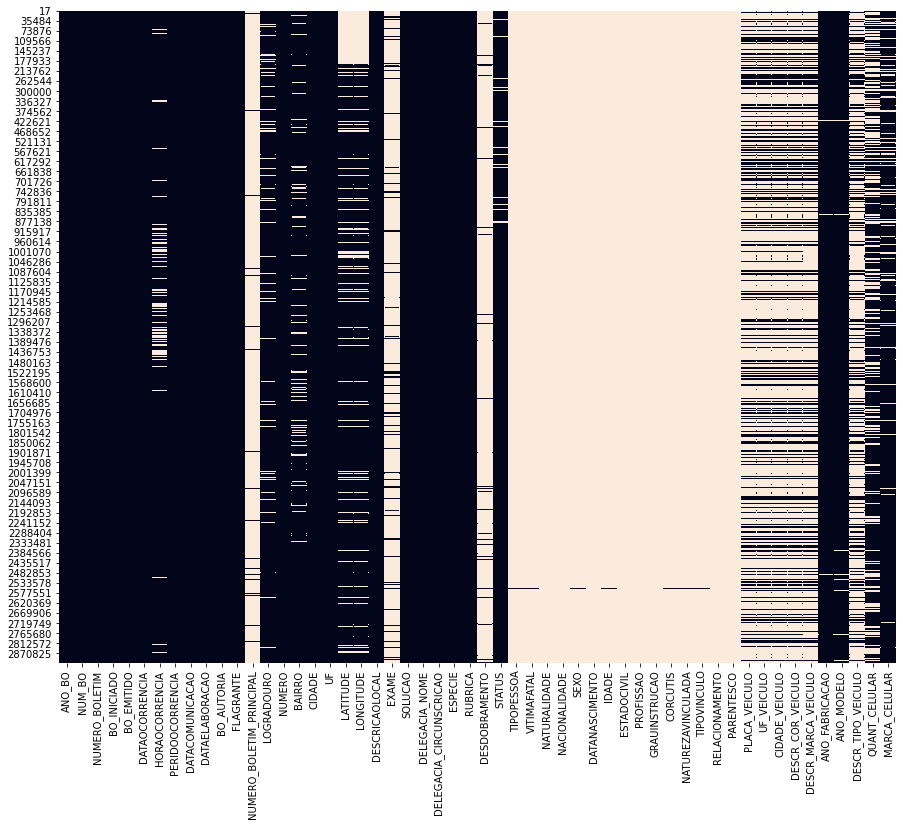

In [7]:
fig = plt.figure(figsize = (15,12));
sns.heatmap(dfsbc.isnull(), cbar = False);

### Remover colunas e dados indesejados

Primeiramente avaliar entre as colunas que tem mais que 70% dos dados ausentes o que é possível eliminar e criar uma lista com esses campos

In [8]:
nulos.index[nulos > 0.7]

Index(['PARENTESCO', 'RELACIONAMENTO', 'NACIONALIDADE', 'PROFISSAO',
       'GRAUINSTRUCAO', 'NATURALIDADE', 'DATANASCIMENTO', 'ESTADOCIVIL',
       'IDADE', 'NATUREZAVINCULADA', 'TIPOPESSOA', 'SEXO', 'CORCUTIS',
       'VITIMAFATAL', 'TIPOVINCULO', 'NUMERO_BOLETIM_PRINCIPAL',
       'DESDOBRAMENTO', 'EXAME', 'PLACA_VEICULO', 'DESCR_MARCA_VEICULO',
       'CIDADE_VEICULO', 'UF_VEICULO', 'DESCR_TIPO_VEICULO',
       'DESCR_COR_VEICULO', 'QUANT_CELULAR', 'LATITUDE', 'LONGITUDE',
       'MARCA_CELULAR', 'HORAOCORRENCIA', 'BAIRRO', 'LOGRADOURO', 'STATUS',
       'ANO_MODELO'],
      dtype='object')

Os campos pessoais podem ser diretamente eliminados, para os demais campos será analisado a real necessidade

In [9]:
eliminar = ['PARENTESCO', 'RELACIONAMENTO', 'NACIONALIDADE', 'PROFISSAO',
       'GRAUINSTRUCAO', 'NATURALIDADE', 'DATANASCIMENTO', 'ESTADOCIVIL',
       'IDADE', 'NATUREZAVINCULADA', 'TIPOPESSOA', 'SEXO', 'CORCUTIS',
       'TIPOVINCULO']

In [10]:
dfsbc.drop(eliminar, axis=1, inplace=True)

c:\users\caior\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [11]:
dfsbc.shape

(85390, 40)

### Analisando demais colunas

Usar comando abaixo para ajustar configurações de visualização do pandas para explorar os dados das colunas

In [12]:
pd.set_option('display.max_columns', 60) # Define limite de 60 colunas na visualização
#pd.set_option('display.max_seq_items', 30) # Define limite de linhas na visualização

Selecionar somente os campos onde há vitima fatal e contar.

De acordo com o site da SSP-SP, a referência de quantidade de Boletins de Ocorrência deve ser pelo Número do Boletim (NUMERO_BOLETIM).

Neste caso, houve 22 vitimas fatais entre 2010 e 2020,

Por esta razão os dados serão mantidos, apenas a coluna será removida



In [13]:
vitimafatal = dfsbc[dfsbc['VITIMAFATAL'].isnull()==False]
total_vf = len(vitimafatal['NUMERO_BOLETIM'].unique())
print(total_vf, 'vitimas fatais de 2010 à 2020')

22 vitimas fatais de 2010 à 2020


Neste caso, houve 22 vitimas fatais entre 2010 e 2020,

Por esta razão os dados serão mantidos, apenas a coluna `'VITIMAFATAL'` será removida.

Os campos `'DESDOBRAMENTO'`, `'EXAME'`, possuem informações que não são relevantes para a ánalise, porém os dados devem ser mantidos, removendo apenas as colunas

In [14]:
dfsbc.EXAME.unique()

array([nan, 'IML', 'IC', 'IC-IML'], dtype=object)

In [15]:
dfsbc.DESDOBRAMENTO.unique()

array([nan,
       'caput. Subtrair coisa móvel alheia, mediante grave ameaça ou violência a pessoa',
       'Nas mesmas penas incorrem quem (Par. único)',
       '§3o. Se da violência resulta morte:', 'Sequestro Relâmpago',
       '§1o. (...) logo depois de subtraída a coisa, emprega violência contra pessoa',
       'IV - aceleração de parto:',
       '§3o. Se da violência resulta lesão corporal grave:',
       'Morte decorrente de intervenção policial (RES. SSP 05 - 07/01/2013)',
       '§4o. Se o crime é cometido:',
       '§2o. Se resulta grave sofrimento físico ou moral',
       'I - com violência à pessoa ou grave ameaça;',
       'Lesão corporal decorrente de intervenção policial (RES. SSP 05 - 07/01/2013)',
       'Meio empregado para destruição ou rompimento de obstáculo à subtração da coisa',
       'VII - contra autoridade ou agente descrito nos arts. 142 e 144 da CF',
       'caput. Adulterar/remarcar núm de chassi ou sinal identificador de veículo',
       'Caput Corromper

In [16]:
eliminar = ['VITIMAFATAL', 'DESDOBRAMENTO', 'EXAME']

dfsbc.drop(eliminar, axis=1, inplace=True)

c:\users\caior\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Antes de Eliminar os campos abaixo, cabe-se investigar se o BO esta registrado no roubo ou furto do veiculo

In [17]:
df_roubo_v = pd.read_csv('data_cleaned/roubo_veiculo2010_2020.csv')
df_furto_v = pd.read_csv('data_cleaned/furto_veiculo2010_2020.csv')

c:\users\caior\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (18,19,29,30,31,32,33,34,36,37,38,39,40,41,42) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
c:\users\caior\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (14,18,19,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [18]:
df_roubo_v = df_roubo_v.loc[df_roubo_v.CIDADE == 'S.BERNARDO DO CAMPO']
df_furto_v = df_furto_v.loc[df_furto_v.CIDADE == 'S.BERNARDO DO CAMPO']

In [19]:
placas_roubo_v = df_roubo_v.PLACA_VEICULO.unique()
placas_furto_v = df_furto_v.PLACA_VEICULO.unique()
placas_celular = dfsbc.PLACA_VEICULO.unique()

In [20]:
print(len(placas_roubo_v), ' Registros de roubo de veiculos por placa')
print(len(placas_furto_v), ' Registros de furto de veiculos por placa')
print(len(placas_celular), ' Registros de celulares com de veiculos envolvidos, por placa')

34534  Registros de roubo de veiculos por placa
26273  Registros de furto de veiculos por placa
14590  Registros de celulares com de veiculos envolvidos, por placa


In [21]:
count_roubo = 0
count_furto = 0
count_n_presente = 0
placas_n_presente = []
for i in placas_celular:
    if i in placas_roubo_v:
        count_roubo += 1
#        print(i, 'esta presente em roubo')
    elif i in placas_furto_v:
        count_furto += 1
#        print(i, 'esta presente em roubo')
    else:
        count_n_presente += 1
        placas_n_presente.append(i)
print(count_roubo, ' Estão presentes em roubo de veículos')
print(count_furto, ' Estão presentes em furto de veículos')
print(count_n_presente, ' Não estão presente em roubo ou furto de veículos')

14510  Estão presentes em roubo de veículos
3  Estão presentes em furto de veículos
77  Não estão presente em roubo ou furto de veículos


# Remover entradas onde há furto e roubo de veículos

Para isso será selecionado somente os campos onde não há registro por placa ou as placas não estão presentes nos outros 2 *datasets* 

In [22]:
dfsbc = dfsbc.loc[dfsbc.PLACA_VEICULO.isin(placas_n_presente[:])]

Os campos `'PLACA_VEICULO'`, `'DESCR_MARCA_VEICULO'`, `'CIDADE_VEICULO'`, `'UF_VEICULO'`, `'DESCR_TIPO_VEICULO'`, `'DESCR_COR_VEICULO'` também serão eliminados por se traterem de envolvimento de veículos.

In [23]:
el_linhas = ['PLACA_VEICULO', 'DESCR_MARCA_VEICULO', 'CIDADE_VEICULO', 'UF_VEICULO', 'DESCR_TIPO_VEICULO', 'DESCR_COR_VEICULO']

In [24]:
dfsbc.drop(el_linhas, axis=1, inplace=True)

In [25]:
dfsbc.shape

(61942, 31)

Plotar novamente o gráfico *heatmap* para verificar como ficou o dataset após a eliminação dos dados anteriores

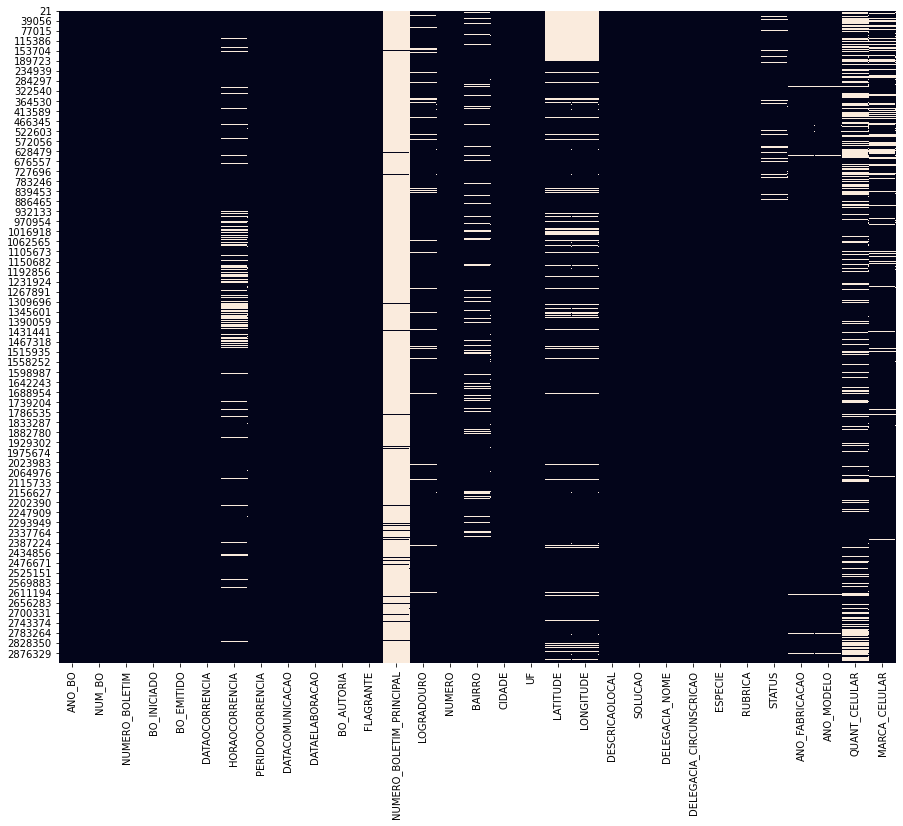

In [26]:
fig = plt.figure(figsize = (15,12));
sns.heatmap(dfsbc.isnull(), cbar = False);

## Ano Modelo e Ano Fabricação

Ao executar o comando `.describe()` é possivel ver que ao menos 75% dos valores estão com o valor "0"

O mesmo pode ser visualizado com gráficos de *boxplot*

Portanto essas 2 colunas serão removidas, antes apenas para ter certeza, será feita a contagem das célular nulas e em branco desses campos

,ANO_BO,NUM_BO,NUMERO,ANO_FABRICACAO,ANO_MODELO
count,61942.000000,6.194200e+04,6.194200e+04,61541.000000,61540.000000
mean,2015.219205,2.265591e+05,4.971595e+04,10.569003,10.496815
std,2.949486,4.549302e+05,6.832981e+06,145.279061,144.708281
min,2010.000000,1.000000e+00,0.000000e+00,0.000000,0.000000
25%,2013.000000,1.714250e+03,1.000000e+01,0.000000,0.000000
50%,2015.000000,4.943500e+03,1.500000e+02,0.000000,0.000000
75%,2018.000000,5.934600e+04,6.240000e+02,0.000000,0.000000
max,2020.000000,3.000111e+06,1.000000e+09,2018.000000,2019.000000


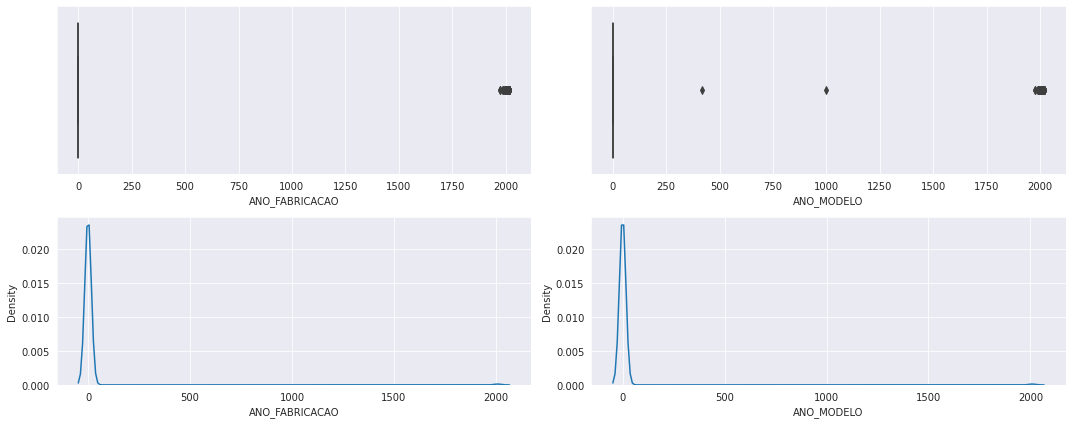

In [27]:
display(dfsbc.describe())


f = plt.figure(figsize=(15, 6))
gs = f.add_gridspec(2, 2)

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    sns.boxplot(x=dfsbc['ANO_FABRICACAO'])

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 1])
    sns.boxplot(x=dfsbc['ANO_MODELO'])


with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[1, 0])
    sns.kdeplot(x=dfsbc['ANO_FABRICACAO'], ax=ax)

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[1, 1])
    sns.kdeplot(x=dfsbc['ANO_MODELO'], ax=ax)

f.tight_layout()

In [28]:
# Quantidade de entradas "0"
anos_zeros = len(dfsbc[['ANO_FABRICACAO', 'ANO_MODELO']].loc[(dfsbc['ANO_FABRICACAO'] == 0)])
print(anos_zeros)

61217


In [29]:
# Quantidade de entradas "NaN"
anos_nulos = len(dfsbc[['ANO_FABRICACAO', 'ANO_MODELO']].loc[(dfsbc['ANO_FABRICACAO'].isna() == True)])
print(anos_nulos)

401


In [30]:
#Quantidade de registros total menos zeros e nulos
print(dfsbc.shape[0] - anos_zeros - anos_nulos, 'Registros não "0" e não nulos')


324 Registros não "0" e não nulos


Remoção das colunas Ano Fabricação e Ano Modelo

In [31]:
print(dfsbc.shape)
dfsbc.drop(['ANO_FABRICACAO', 'ANO_MODELO'], axis=1, inplace=True)
print(dfsbc.shape)

(61942, 31)
(61942, 29)


## Ajuste do tipo das variáveis


Os campos `NUMERO`, e `QUANT_CELULAR` serão convertidos para inteiros,

*obs: os valores apresentados como NaN serão preenchidos com "0"*

In [32]:
#nos campos NUMERO e QUANT_CELULAR os valores apresentados como NaN serão preenchidos com "0"
lista_int = ['NUMERO', 'QUANT_CELULAR']
for i in lista_int:
    dfsbc[i] = pd.to_numeric(dfsbc[i].replace(np.nan, 0), downcast='integer', errors='coerce')

In [33]:
dfsbc.dtypes

ANO_BO                       int64
NUM_BO                       int64
NUMERO_BOLETIM              object
BO_INICIADO                 object
BO_EMITIDO                  object
DATAOCORRENCIA              object
HORAOCORRENCIA              object
PERIDOOCORRENCIA            object
DATACOMUNICACAO             object
DATAELABORACAO              object
BO_AUTORIA                  object
FLAGRANTE                   object
NUMERO_BOLETIM_PRINCIPAL    object
LOGRADOURO                  object
NUMERO                       int32
BAIRRO                      object
CIDADE                      object
UF                          object
LATITUDE                    object
LONGITUDE                   object
DESCRICAOLOCAL              object
SOLUCAO                     object
DELEGACIA_NOME              object
DELEGACIA_CIRCUNSCRICAO     object
ESPECIE                     object
RUBRICA                     object
STATUS                      object
QUANT_CELULAR                int16
MARCA_CELULAR       

## Salvar o arquivo em um novo arquivo *.csv*

In [34]:
dfsbc.to_csv('data_cleaned/roubos_cel_sbc.csv', index=False)